Import necessary packages.

In [1]:
# import all functions from python labrary: sympy
from sympy import *
# import python library: matplotlib (for nice plots)
import matplotlib
# set sympy output to print pretty math expressions
init_printing()

Declare variables we are going to use as 'symbols'. We will add more along the way, if necessary.

In [2]:
### NOTE: it is important here to further declare these variables to be nonzero and positive (otherwise sympy cannot find solution for the FOCs)
#    Thanks to Abhi Agarwal for discovering this trick
L, K, w, r, qbar = symbols('L K w r \overline{q}', nonzero=True, positive=True)

# 1. Solve for cost-minimizing input bundle analytically

## Setup the optimization program

Our optimization problem is
\begin{align}
    & \min_{q_1,q_2} \quad p_1 q_1 + p_2 q_2 \\
    \text{s.t.}\quad & q_1^{\alpha} q_2^{1-\alpha} = \overline{U}
\end{align}

## Setup the utility function

In [3]:
### Note that it is important here to further declare these variables to be nonzero and positive
#    Thanks to Abhi Agarwal for discovering this trick
alpha, beta = symbols('alpha beta',nonzero=True, positive=True)

# Note: in sympy syntax: use double star ** for power
y = L**(alpha) * K**(beta)
# show the defined function
y

## Setup the lagrangian

In [4]:
lam = symbols('lambda')
lagr = w*L + r*K + lam *(qbar - y)
lagr

Solve the first-order conditions. 

Note the syntax of the solve function, especially the use of the brackets:
solve( (eq1, eq2, eq3), var1, var2, var3)

The equations are by default treated as equal to 0 by the solver.

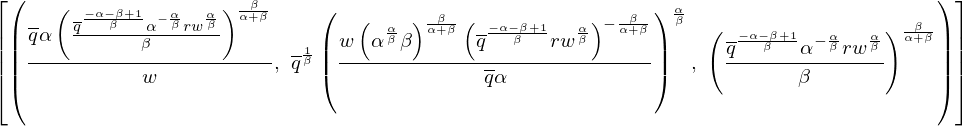

In [5]:
foc_sol = solve( ( diff(lagr,L), diff(lagr,K), diff(lagr,lam) ), [L,K,lam])
foc_sol

The solution is a list with one element, because our solution is unique.

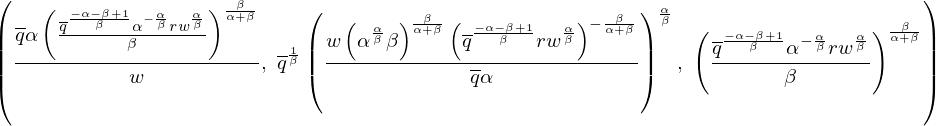

In [6]:
foc_sol[0]

To access the first element in our solution, which is a list by itself, we use the list index again.

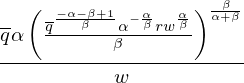

In [7]:
Lstar = foc_sol[0][0]
Lstar

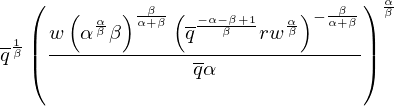

In [8]:
Kstar = foc_sol[0][1]
Kstar

Substitute optimal input into the cost, to calculate the minimum cost level necessary at the given output variables. 

The resulting function is our **cost function**, $C(w,r,\overline{q})$.

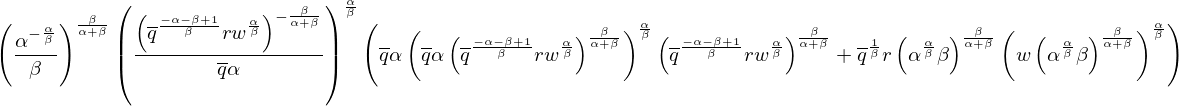

In [9]:
C = (w*L + r*K).subs([(L,Lstar), (K,Kstar)])
# simplify function does not work well here, but we can further simplify by hand
C.simplify()

# 2. Solve Profit-maximization problem under this cost function

The firm chooses output level $q$ to maximize its profit
$$\max_{q} \pi(q,p,w,r) = p*q - C(w,r,q)$$

In [10]:
# define symbols p and q
p, q = symbols('p q', nonzero=True, positive=True)
# define profit function
profit = p*q - C.subs([(qbar, q)])

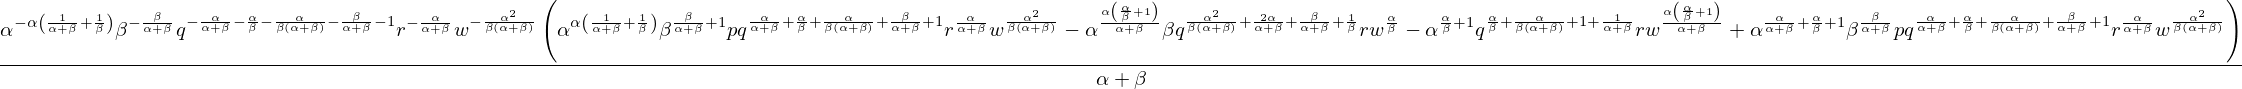

In [12]:
# FOC is
profit.diff(q).simplify()

If we impose $\alpha = 1$, $\beta = 1$

In [16]:
profit = ( p*q - C.subs([(qbar, q), (alpha, Rational(1)), (beta, Rational(1))]) ).simplify()
profit

Solve for the optimal output level that maximizes profit

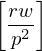

In [21]:
qstar_sol = solve(profit.diff(q), q)
qstar_sol

In [22]:
qstar = qstar_sol[0]
qstar

## comparative statics

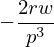

In [25]:
qstar.diff(p)

In [24]:
qstar.diff(r)

In [26]:
qstar.diff(w)